# PS 4
# Q1
# (a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = ('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv')
auto = pd.read_csv(url)
auto.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
                   'year','origin','name']
mask1 = auto['horsepower'] != '?'
auto = auto[mask1]
auto['horsepower'] = auto['horsepower'].apply(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# (b)

In [3]:
auto_data = auto.drop(['name'], 1)

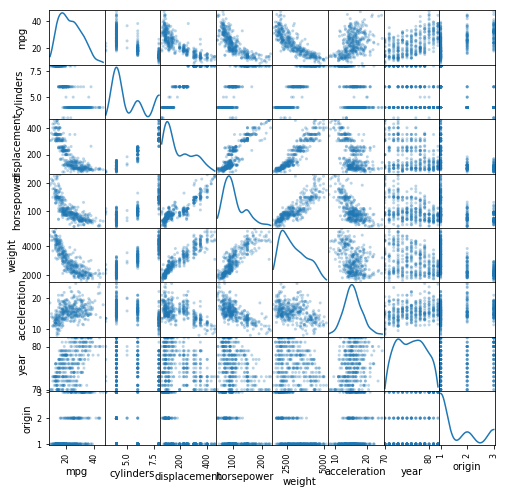

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(auto_data, alpha=0.3, figsize=(8, 8), diagonal='kde')
plt.show()

# (c)

In [5]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


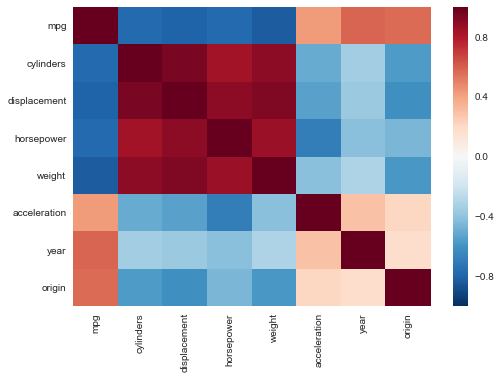

In [6]:
import seaborn as sb
sb.heatmap(auto_data.corr())
plt.show()

# (d)

In [7]:
import statsmodels.api as sm
Y = auto['mpg']
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
res1 = model1.fit()
print(res1.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        22:27:21   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

### i. The coefficients are statistically siginificant at 1% level for dislacement, weight, year and origin, as well as the constant

### ii. The coefficients are not siginifcant at 10% level for cylinders, horsepower and acceleration, that is horsepower and accelearation.  

### iii. The model specified means that with one year increas, 0.75 mpg is increased. 

# (e) 
### i. In my opinion the engine displacement, horsepower and weight is likely to have non-linear relationship

In [8]:
auto['displacement_2'] = auto['displacement'].apply(lambda x: x**2)
auto['horsepower_2'] = auto['horsepower'].apply(lambda x: x**2)
auto['acceleration_2'] = auto['acceleration'].apply(lambda x: x**2)
auto['weight_2'] = auto['weight'].apply(lambda x: x**2)
Y = auto['mpg']
X2 = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin',
                   'displacement_2', 'horsepower_2','acceleration_2', 'weight_2']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y, X2)
res2 = model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        22:27:21   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.1084      6.696      3.

### ii. R squre is 0.864 imporve for 4% compared to pervious  0.821.

### iii. The significance of coefficient of displacement change from 1% level to 0.1% level, thus improve the significance. Its' square term of displacement is not siginifcant even at 10% level.

### iv. It change from 0.128 to 0.440, becomes more insiginicant.

# 2 Classification problem: KKN by hand and in Python

In [9]:
import math
from sklearn import neighbors
data  = pd.read_csv('kkn.csv')
data.columns = ['x1', 'x2', 'x3', 'y']

In [10]:
data

,x1,x2,x3,y
0,0,3,0,red
1,2,0,0,red
2,0,1,3,red
3,0,1,2,green
4,-1,0,1,green
5,1,1,1,red


In [11]:
data['x1^2'] = data['x1'].apply(lambda x: x**2) 
data['x2^2'] = data['x2'].apply(lambda x: x**2) 
data['x3^2'] = data['x3'].apply(lambda x: x**2) 
data['dist'] = np.sqrt(np.array(data['x1^2']) + np.array(data['x2^2']) + np.array(data['x3^2'])) 

In [12]:
data

,x1,x2,x3,y,x1^2,x2^2,x3^2,dist
0,0,3,0,red,0,9,0,3.000000
1,2,0,0,red,4,0,0,2.000000
2,0,1,3,red,0,1,9,3.162278
3,0,1,2,green,0,1,4,2.236068
4,-1,0,1,green,1,0,1,1.414214
5,1,1,1,red,1,1,1,1.732051


### (b) K = 1, we use the neariest point observation 4, itis green, so we predict Y as green

### (c) K = 3, we use 3,4,5, 2/3 are green and 1/3 is red, so we predict Y as green

### (d) If we have non linear data, we will be better if we use small k. This is because, if we have small k, we have less smoothing to the classification, then it will bring less bias to the boundary, well fitted for the non-linear feature of the data.

In [13]:
data2 = pd.read_csv('kkn.csv')
data2.columns = ['x1', 'x2', 'x3', 'y']
y = data2['y']
x = np.column_stack((data2['x1'], data['x2'], data['x3']))
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
model2 = knn.fit(x, y)

In [14]:
print('KKN prediction', model2.predict([(1,1,1)])[0])

KKN prediction green


# 3 Logister regression

In [15]:
import statsmodels.api as sm
median = auto['mpg'].median()
auto['mpg_high_truth'] = auto['mpg']  >= median
auto['mpg_high'] = auto['mpg_high_truth'].apply(lambda x: int(x))
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,displacement_2,horsepower_2,acceleration_2,weight_2,mpg_high_truth,mpg_high
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,94249.0,16900,144.00,12278016,False,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,122500.0,27225,132.25,13638249,False,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,101124.0,22500,121.00,11806096,False,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,92416.0,22500,144.00,11785489,False,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,91204.0,19600,110.25,11895601,False,0


In [16]:
Y3 = auto['mpg_high']
X3 = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X3 = sm.add_constant(X3)
LogitModel = sm.Logit(Y3, X3)
LogitReg = LogitModel.fit()
LogitReg.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        22:27:21   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# (a)
### Weights and year have a siginificant at 5% level. 

# (b) 
### Divide the data into tranining set of half of the data randomly selected and a test set of the remanining half of the data using the train_test_split module of the scikit-learn.cross_validation package.

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size = .5,
                                                    random_state=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### (c)
Use scikit-learn to estimate a logistic regression model on the training data. Report your estimated intercet and coefficients.

In [18]:
LogReg = LogisticRegression()
LogRes = LogReg.fit(X_train, y_train)
print('The intercept is',LogRes.intercept_)
print('The coefficients are', LogRes.coef_)

The intercept is [-0.07022621]
The coefficients are [[-0.07022621 -0.67604786  0.00608728 -0.03802261 -0.00505466 -0.13489425
   0.29986833 -0.15403736]]


### (d)
Create predicted values of mpg_high for the test set and calculate the confusion matrix and classification report for the Logit model on the test data. Does this model predict low mpg or high mpg better?

In [19]:
y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [20]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



In my oppinion the prediction of low mpg and high mpg are quite similar. The difference is marginal.